In [6]:
import glob, os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
pd.options.mode.copy_on_write = True 

In [7]:
date_field = 'RECVDATE'
dir_path = 'data'
# dfs = [pd.read_csv(f, encoding='latin-1', low_memory=False, quotechar='"') for f in glob.glob(os.path.join(dir_path, '2021VAERSDATA.csv'))]
# dfs = [pd.read_csv(f, encoding='latin-1', low_memory=False, quotechar='"') for f in glob.glob(os.path.join(dir_path, 'NonDomesticVAERSDATA.csv'))]
dfs = [pd.read_csv(f, encoding='latin-1', low_memory=False, quotechar='"') for f in glob.glob(os.path.join(dir_path, '[12]*VAERSDATA.csv'))]
df = pd.concat(dfs, axis=0, ignore_index=True)

In [8]:
df[date_field] = pd.to_datetime(df[date_field], errors='coerce')

In [9]:
died_y = df[df['DIED'] == 'Y']
died_y.loc[:, 'YearMonth'] = died_y[date_field].dt.to_period('M')
monthly_counts = died_y.groupby('YearMonth').size()
monthly_counts.index = monthly_counts.index.astype(str)

In [10]:
l_threat_y = df[df['L_THREAT'] == 'Y']
l_threat_y.loc[:, 'YearMonth'] = l_threat_y[date_field].dt.to_period('M')
monthly_counts_l_threat = l_threat_y.groupby('YearMonth').size()
monthly_counts_l_threat.index = monthly_counts_l_threat.index.astype(str)

hospital_y = df[df['HOSPITAL'] == 'Y']
hospital_y.loc[:, 'YearMonth'] = hospital_y[date_field].dt.to_period('M')
monthly_counts_hospital = hospital_y.groupby('YearMonth').size()
monthly_counts_hospital.index = monthly_counts_hospital.index.astype(str)

er_visit_y = df[df['ER_VISIT'] == 'Y']
er_visit_y.loc[:, 'YearMonth'] = er_visit_y[date_field].dt.to_period('M')
monthly_counts_er_visit = er_visit_y.groupby('YearMonth').size()
monthly_counts_er_visit.index = monthly_counts_er_visit.index.astype(str)


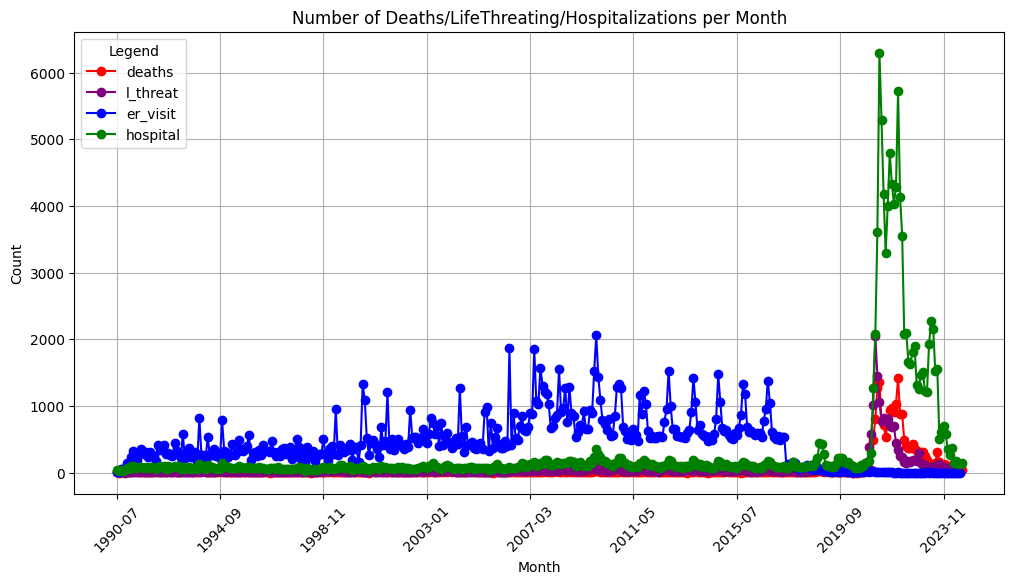

In [11]:
# Plotting
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', label='deaths', color='red')
# monthly_no_counts.plot(kind='line', marker='o', label='did not die', color='black')
# monthly_not_dhle_counts.plot(kind='line', marker='o', label='did not die', color='black')
monthly_counts_l_threat.plot(kind='line', marker='o', label='l_threat', color='purple')
monthly_counts_er_visit.plot(kind='line', marker='o', label='er_visit', color='blue')
monthly_counts_hospital.plot(kind='line', marker='o', label='hospital', color='green')
# monthly_vax_taken_premortem.plot(kind='line', marker='o', label='deaths', color='blue')
# monthly_counts_first.plot(kind='line', marker='o', label='deaths first vax', color='green')
# monthly_counts_prior.plot(kind='line', marker='o', label='deaths prior vax', color='red')
plt.title('Number of Deaths/LifeThreating/Hospitalizations per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
#plt.tight_layout()
plt.legend(title='Legend', loc='upper left')
plt.show()